<a href="https://colab.research.google.com/github/LuJam2021/Python_Learning_History/blob/main/20211015_Pyfolio%E4%BD%BF%E7%94%A8_ffn_%E8%A8%88%E7%AE%97%E8%82%A1%E7%A5%A8%E7%9A%84%E7%B8%BE%E6%95%88%E8%A1%A8%E7%8F%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pyfolio

     |████████████████████████████████| 91 kB 8.4 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88681 sha256=3c9c911710a8919f4680227d69810a2f8f37ce7d601487536d64c8ffdedada67
  Stored in directory: /root/.cache/pip/wheels/e4/96/9b/0dfff5453e702fd780a099b7c850521099c5ec0dfafae189f9
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39777 sha256=f1f2165abdd482c04e4e5b633972e5b86c087b7648066d6c47314ec5d105af9c
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [ ]:
import pyfolio as pf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas_datareader.data as web
import requests

headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}

In [ ]:
s=requests.session()
s.headers = headers
df=web.DataReader('FB','yahoo','2010-01-01',session=s)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [ ]:
stock_rets=df['Close'].pct_change()

In [ ]:
df['ret']=stock_rets

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,ret
Date,,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000,NaN
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999,-0.109861
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000,-0.089039
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000,0.032258
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999,0.032187


In [ ]:
# pyfolio這個套件裡面目前有一些錯誤
# 可以查詢他的 github 上面的 issues: https://github.com/quantopian/pyfolio/issues
# 所以我們改用 ffn 來計算 performance
#pf.create_returns_tear_sheet(stock_rets, live_start_date='2016-12-01')

AttributeError: ignored

#使用 ffn 計算股票的績效表現

https://pmorissette.github.io/ffn/



In [ ]:
#!pip install -q ffn

In [ ]:
import ffn
import pandas as pd

In [ ]:
prices = pd.DataFrame()

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [ ]:
df = df[['Close']]
df.head()

,Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


In [ ]:
df.columns = ['FB']

In [ ]:
prices = pd.DataFrame()

In [ ]:
prices['AAPL']=web.DataReader('AAPL','yahoo','2010-01-01',session=s)['Close']

In [ ]:
prices['MSFT'] = web.DataReader('MSFT', 'yahoo', '2010-01-01', session=s)['Close']

In [ ]:
prices['TSLA'] = web.DataReader('TSLA', 'yahoo', '2010-01-01', session=s)['Close']

In [ ]:
prices.head()

,AAPL,MSFT,AMZN,ORCL,GOOG
Date,,,,,
2010-01-04,7.643214,30.950001,133.899994,24.850000,312.204773
2010-01-05,7.656429,30.959999,134.690002,24.820000,310.829926
2010-01-06,7.534643,30.770000,132.250000,24.459999,302.994293
2010-01-07,7.520714,30.450001,130.000000,24.379999,295.940735
2010-01-08,7.570714,30.660000,133.520004,24.680000,299.885956


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
prices.drop('TSLA', axis=1,inplace=True)

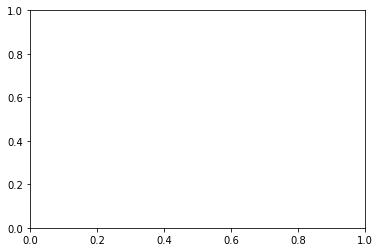

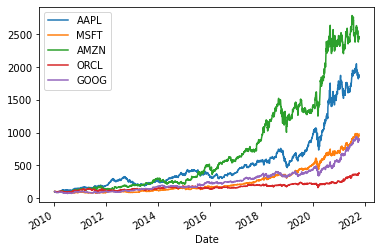

In [ ]:
fig, ax = plt.subplots()
ax = prices[:'2021'].rebase().plot()

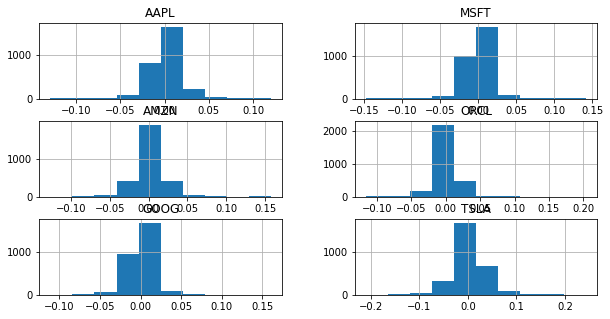

In [ ]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize=(10, 5))

In [ ]:
stats = prices.calc_stats()
stats.display()

Stat                 AAPL        MSFT        AMZN        ORCL        GOOG        TSLA
-------------------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2010-06-29  2010-06-29  2010-06-29  2010-06-29  2010-06-29  2010-06-29
End                  2021-10-14  2021-10-14  2021-10-14  2021-10-14  2021-10-14  2021-10-14
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         1471.33%    1198.80%    2938.27%    338.07%     1149.87%    17026.83%
Daily Sharpe         1.01        1.03        1.13        0.64        1.00        1.09
Daily Sortino        1.68        1.73        1.95        1.03        1.69        1.92
CAGR                 27.62%      25.49%      35.29%      13.97%      25.06%      57.68%
Max Drawdown         -44.38%     -28.24%     -34.10%     -33.83%     -30.79%     -60.63%
Calmar Ratio         0.62        0.90        1.03        0.41        0.81        0.95

MTD                  1.

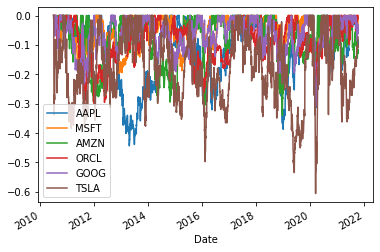

In [ ]:
# what about the drawdowns?
ax = stats.prices.to_drawdown_series().plot()

In [ ]:
returns.corr().as_format('.2f')

,AAPL,MSFT,AMZN,ORCL,GOOG,TSLA
AAPL,1.00,0.56,0.45,0.43,0.53,0.31
MSFT,0.56,1.00,0.53,0.55,0.62,0.32
AMZN,0.45,0.53,1.00,0.38,0.58,0.32
ORCL,0.43,0.55,0.38,1.00,0.45,0.22
GOOG,0.53,0.62,0.58,0.45,1.00,0.31
TSLA,0.31,0.32,0.32,0.22,0.31,1.00


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

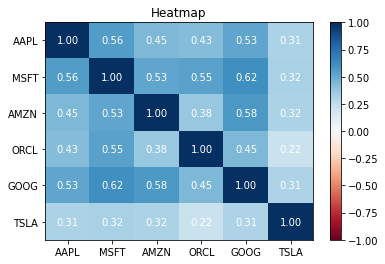

In [ ]:
returns.plot_corr_heatmap()